<a href="https://colab.research.google.com/github/harshj3915/Intuitionistic-FCM-Smote/blob/Harsh/Harsh_FCM-CSMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
# %pip install numpy
# %pip install -q numpy scikit-learn imbalanced-learn
# %pip install ucimlrepo matplotlib
# %pip install -U imbalanced-learn fcmeans
# %pip install -U scikit-learn

In [55]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
  
# metadata 
print(iris.metadata) 
  
# variable information 
print(iris.variables) 


{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'ID': 191, 'type': 'NATIVE', 'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'venue': 'Significance, 2021', 'year': 2021, 'journal': 'Significance, 2021', 'DOI': '1740-9713.01589', 'URL': 'https://www.semanticscholar.org

In [81]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

def extract_and_visualize_k_clusters_with_dbscan(X, k):
    """
    Extract and visualize the first k clusters from the data using the DBSCAN algorithm.
    
    Args:
    - X : Feature matrix (dataset)
    - k : Number of clusters to extract
    
    Returns:
    - k_clusters : List of the first k clusters
    """
    # Apply DBSCAN to find clusters
    dbscan = DBSCAN(eps=0.9, min_samples=10)
    dbscan.fit(X)
    
    # Get the cluster labels assigned by DBSCAN
    cluster_labels = dbscan.labels_
    
    # Identify the unique cluster labels (ignoring noise, labeled as -1)
    unique_labels = np.unique(cluster_labels)
    
    # Initialize a list to store the first k clusters
    k_clusters = []
    
    # Loop over unique labels and extract the first k clusters (excluding noise)
    for label in unique_labels:
        if label != -1 and len(k_clusters) < k:  # Ignore noise (-1) and stop when we get k clusters
            cluster = X[cluster_labels == label]
            k_clusters.append(cluster)

    # Visualization of clusters using the first two features for 2D plotting
    plt.figure(figsize=(10, 6))
    
    # Loop over each cluster and plot
    for label in unique_labels:
        if label == -1:
            # Plot noise points in black
            plt.scatter(X[cluster_labels == label][:, 0], X[cluster_labels == label][:, 1], 
                        c='k', marker='x', label='Noise')
        else:
            if len(k_clusters) < k:  # Only plot up to k clusters
                # Generate a color for the cluster
                color = plt.cm.rainbow(float(label) / len(unique_labels))
                plt.scatter(X[cluster_labels == label][:, 0], X[cluster_labels == label][:, 1], 
                            c=[color], label=f'Cluster {label}')
    
    # Add labels and title to the plot
    plt.title(f'DBSCAN Clustering with First {k} Clusters')
    plt.legend()
    plt.show()
    
    return k_clusters


[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


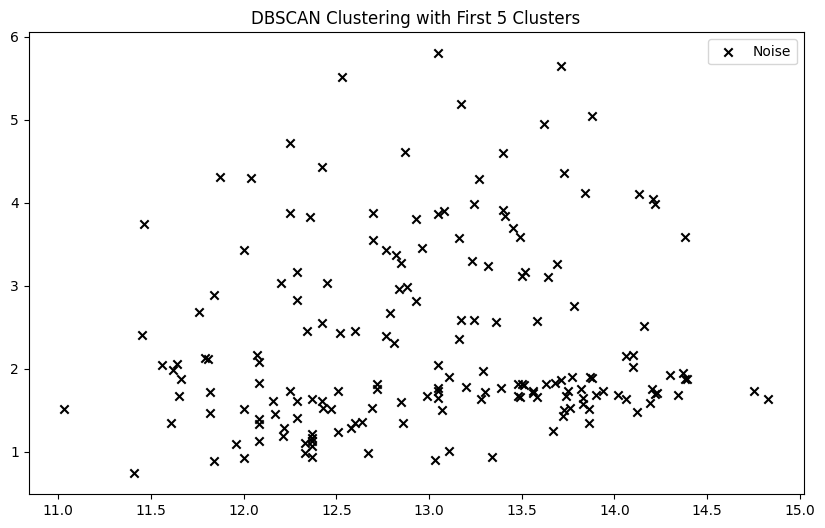

[]


In [84]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = iris.data.features.values

print(X)

  
print(extract_and_visualize_k_clusters_with_dbscan(X, 5))


In [58]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from fcmeans import FCM
from sklearn.neighbors import NearestNeighbors
import copy
import warnings
import math
import copy
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.utils import check_random_state
from sklearn.metrics.pairwise import euclidean_distances
from imblearn.over_sampling.base import BaseOverSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.exceptions import raise_isinstance_error
from imblearn.utils import check_neighbors_object
from imblearn.utils.deprecation import deprecate_parameter
class FCMCENTERSMOTE(BaseOverSampler):
    def __init__(self, sampling_strategy='auto', random_state=None, kmeans_args=None, smote_args=None,
                 imbalance_ratio_threshold=1.0, density_power=None, use_minibatch_kmeans=True, n_jobs=1, **kwargs):
        super(FCMCENTERSMOTE, self).__init__(sampling_strategy=sampling_strategy, **kwargs)
        if kmeans_args is None:
            kmeans_args = {}
        if smote_args is None:
            smote_args = {}
        self.imbalance_ratio_threshold = imbalance_ratio_threshold
        self.kmeans_args = copy.deepcopy(kmeans_args)
        self.smote_args = copy.deepcopy(smote_args)
        self.random_state = random_state
        self.n_jobs = n_jobs
        self.use_minibatch_kmeans = use_minibatch_kmeans
        self.density_power = density_power

    def _cluster(self, X):
        fcm = FCM(**self.kmeans_args)
        fcm.fit(X)
        fcm_labels = fcm.predict(X)
        cluster_assignment = np.asarray(fcm_labels)
        print("cluster_assignment",cluster_assignment)
        return cluster_assignment

    def _filter_clusters(self, X, y, cluster_assignment, minority_class_label):
      largest_cluster_label = np.max(np.unique(cluster_assignment))
      sparsity_factors = np.zeros((largest_cluster_label + 1,), dtype=np.float64)
      minority_mask = (y == minority_class_label)
      imbalance_ratio_threshold = self.imbalance_ratio_threshold
      

      if isinstance(imbalance_ratio_threshold, dict):
          imbalance_ratio_threshold = imbalance_ratio_threshold.get(minority_class_label, 1.0)

      for i in np.unique(cluster_assignment):
          cluster = X[cluster_assignment == i]
          mask = minority_mask[cluster_assignment == i]
          minority_count = np.sum(mask)
          majority_count = np.sum(~mask)
          imbalance_ratio = (majority_count + 1) / (minority_count + 1)

          if (imbalance_ratio < imbalance_ratio_threshold) and (minority_count > 1):
              distances = euclidean_distances(cluster[mask])
              non_diagonal_distances = distances[~np.eye(distances.shape[0], dtype=bool)]
              average_minority_distance = np.mean(non_diagonal_distances) if non_diagonal_distances.size > 0 else 0.0

              if average_minority_distance == 0:
                  average_minority_distance = 1e-1

              density_factor = minority_count / (average_minority_distance ** self.density_power)
              sparsity_factors[i] = 1 / density_factor

      sparsity_sum = np.sum(sparsity_factors)
      if sparsity_sum == 0:
          sparsity_sum = 1

      sampling_weights = sparsity_factors / sparsity_sum if sparsity_sum != 0 else np.full(sparsity_factors.shape, 1.0)

      return sampling_weights
    @staticmethod
    def smote_oversample_with_point_value(X, y, point_index, sampling_ratio=1.0,smote_args= None,k=5):
      if smote_args is not None and 'k_neighbors' in smote_args:
            k = smote_args['k_neighbors']
      minority_class = np.unique(y)[np.argmin(np.bincount(y))]
      minority_indices = np.where(y == minority_class)[0]
      print(point_index)
      print("hehe ", isinstance(point_index, int) and point_index < len(y) and y[point_index] == minority_class)
      


      if isinstance(point_index, int) and point_index < len(y) and y[point_index] == minority_class:
        num_minority_samples = len(minority_indices)
        num_majority_samples = int(sampling_ratio * len(y)) - num_minority_samples

        knn = NearestNeighbors(n_neighbors=k + 1)
        knn.fit(X[minority_indices])
        nn_indices = knn.kneighbors([X[point_index]], return_distance=False)[0][1:]

        synthetic_samples = []
        for i in range(num_minority_samples):
            nn_index = np.random.choice(nn_indices)
            diff = X[nn_index] - X[point_index]
            synthetic_sample = X[point_index] + np.random.rand() * diff
            synthetic_samples.append(synthetic_sample)
        synthetic_samples = np.array(synthetic_samples)

        X_resampled = np.vstack((X, synthetic_samples))
        y_resampled = np.hstack((y, np.full(len(synthetic_samples), minority_class)))

        shuffle_indices = np.random.permutation(len(X_resampled))
        X_resampled = X_resampled[shuffle_indices]
        y_resampled = y_resampled[shuffle_indices]

        return X_resampled, y_resampled
      else:
        return X, y

    def _fit_resample(self, X, y):
        """Resample the dataset.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Matrix containing the data which have to be sampled.

        y : ndarray, shape (n_samples, )
            Corresponding label for each sample in X.

        Returns
        -------
        X_resampled : ndarray, shape (n_samples_new, n_features)
            The array containing the resampled data.

        y_resampled : ndarray, shape (n_samples_new)
            The corresponding labels of ``X_resampled``

        """
        self._set_subalgorithm_params()

        if self.density_power is None:
            self.density_power = X.shape[1]

        resampled = [ (X.copy(), y.copy()) ]
        sampling_ratio = {k: v for k, v in self.sampling_strategy_.items()}
        # sampling_strategy_ does not contain classes where n_samples 0
        for class_label in np.unique(y):
            if class_label not in sampling_ratio:
                sampling_ratio[class_label] = 0
        print("sampling_ratio",sampling_ratio)
        for minority_class_label, n_samples in sampling_ratio.items():
            print("minority_class_label",minority_class_label)
            if n_samples == 0:
                continue

            cluster_assignment = self._cluster(X)
            sampling_weights = self._filter_clusters(X, y, cluster_assignment, minority_class_label)
            print('Sampling Weights : ',sampling_weights)
            smote_args = self.smote_args.copy()
            if np.count_nonzero(sampling_weights) > 0:
                # perform k-means smote
                for i in np.unique(cluster_assignment):
                    
                    cluster_X = X[cluster_assignment == i]
                    cluster_y = y[cluster_assignment == i]
                    if sampling_weights[i] > 0:
                        # determine ratio for oversampling the current cluster
                        target_ratio = {label: np.count_nonzero(cluster_y == label) for label in sampling_ratio}
                        cluster_minority_count = np.count_nonzero(cluster_y == minority_class_label)
                        generate_count = int(round(n_samples * sampling_weights[i]))
                        target_ratio[minority_class_label] = generate_count + cluster_minority_count

                        # make sure that cluster_y has more than 1 class, adding a random point otherwise
                        remove_index = -1
                        if np.unique(cluster_y).size < 2:
                            remove_index = cluster_y.size
                            cluster_X = np.append(cluster_X, np.zeros((1,cluster_X.shape[1])), axis=0)
                            majority_class_label = next( key for key in sampling_ratio.keys() if key != minority_class_label )
                            target_ratio[majority_class_label] = 1 + target_ratio[majority_class_label]
                            cluster_y = np.append(cluster_y, np.asarray(majority_class_label).reshape((1,)), axis=0)
                        
                        # clear target ratio of labels not present in cluster
                        for label in list(target_ratio.keys()):
                            if label not in cluster_y:
                                del target_ratio[label]
                        
                        # modify copy of the user defined smote_args to reflect computed parameters
                        smote_args['sampling_strategy'] = target_ratio
                        
                        
                        smote_args = self._validate_smote_args(smote_args, cluster_minority_count)
                        # Get the center of the cluster to use as the point for SMOTE oversampling
                        cluster_center = np.mean(cluster_X, axis=0)
                        k_value = smote_args['k_neighbors']
                        print("cluster_center",cluster_center)
                        print('k_value',k_value)
                        print("i",i)
                        X_resampled_cluster, y_resampled_cluster = self.smote_oversample_with_point_value(
                            X, y, cluster_center, sampling_ratio=n_samples / X.shape[0],
                            k=k_value)
                        print("After ",X_resampled_cluster)
                        
                        # if k_neighbors is 0, perform random oversampling instead of smote
                        if 'k_neighbors' in smote_args and smote_args['k_neighbors'] == 0:
                                oversampler_args = {}
                                if 'random_state' in smote_args:
                                    oversampler_args['random_state'] = smote_args['random_state']
                                oversampler = RandomOverSampler(**oversampler_args)
                        print("line 1")
                        # finally, apply smote to cluster
                        with warnings.catch_warnings():
                            # ignore warnings about minority class getting bigger than majority class
                            # since this would only be true within this cluster
                            warnings.filterwarnings(action='ignore', category=UserWarning, message=r'After over-sampling, the number of samples \(.*\) in class .* will be larger than the number of samples in the majority class \(class #.* \-\> .*\)')
                            cluster_resampled_X, cluster_resampled_y = self.smote_oversample_with_point_value(
                            X, y, cluster_center, sampling_ratio=n_samples / X.shape[0],
                            k=smote_args['k_neighbors'])
                        print("line 2")
                        if remove_index > -1:
                            # since SMOTE's results are ordered the same way as the data passed into it,
                            # the temporarily added point is at the same index position as it was added.
                            for l in [cluster_resampled_X, cluster_resampled_y, cluster_X, cluster_y]:
                                np.delete(l, remove_index, 0)

                        # add new generated samples to resampled
                        print(resampled[-2:])
                        resampled.append( (
                            cluster_resampled_X[cluster_y.size:,:],
                            cluster_resampled_y[cluster_y.size:]))
                        print(resampled[-2:])
                        
            else:
                # all weights are zero -> perform regular smote
                warnings.warn('No minority clusters found for class {}. Performing regular SMOTE. Try changing the number of clusters.'.format(minority_class_label))
                target_ratio = {label: np.count_nonzero(y == label) for label in sampling_ratio}
                target_ratio[minority_class_label] = sampling_ratio[minority_class_label]
                minority_count = np.count_nonzero(y == minority_class_label)
                smote_args = self._validate_smote_args(smote_args, minority_count)
                # Get the center of the cluster to use as the point for SMOTE oversampling
                cluster_center = np.mean(cluster_X, axis=0)
                X_resampled_cluster, y_resampled_cluster = self.smote_oversample_with_point_value(
                    X, y, cluster_center, sampling_ratio=n_samples / X.shape[0],
                            k=smote_args['k_neighbors'])

        print("resampled",resampled)
        resampled = list(zip(*resampled))
        if(len(resampled) > 0):
            X_resampled = np.concatenate(resampled[0], axis=0)
            y_resampled = np.concatenate(resampled[1], axis=0)
        return X_resampled, y_resampled

    def _validate_smote_args(self, smote_args, minority_count):
      max_k_neighbors = minority_count - 1
      if 'k' in smote_args and smote_args['k'] > max_k_neighbors:
          smote_args['k'] = max_k_neighbors
      return smote_args

    def _set_subalgorithm_params(self):
      if self.random_state is not None:
          if 'random_state' not in self.smote_args:
              self.smote_args['random_state'] = self.random_state
          if 'random_state' not in self.kmeans_args:
              self.kmeans_args['random_state'] = self.random_state

      if self.n_jobs is not None:
          if 'n_jobs' not in self.smote_args:
              self.smote_args['n_jobs'] = self.n_jobs
          if 'n_jobs' not in self.kmeans_args:
              if not self.use_minibatch_kmeans:
                  self.kmeans_args['n_jobs'] = self.n_jobs


In [59]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 

# Fetch the Iris dataset
iris = fetch_ucirepo(id=53)


# Data (as pandas DataFrames)
df = pd.DataFrame(iris.data.features)

df['Class'] = iris.data.targets


# Replace target class labels (if needed)
# Assuming you want to convert target classes to -1 and 1, you can customize this based on your requirements
df['Class'] = df['Class'].replace('Iris-setosa', 0)  # Set class 0 to -1
df['Class'] = df['Class'].replace('Iris-versicolor', 1)   # Keep class 1 as 1
df['Class'] = df['Class'].replace('Iris-virginica', 1)   # Set class 2 to 1




# Features and target arrays
X = df.iloc[:, :-1].to_numpy()  # All columns except the last one
y = df['Class'].to_numpy()       # The last column as target


# Count occurrences of -1 in the target variable
count_of_minus_one = (y == -1).sum()
print("Number of occurrences of -1 in the 'Class' column:", count_of_minus_one)

# Save the DataFrame to a CSV file
df.to_csv('iris_dataset.csv', index=False)

# Get unique classes
unique_classes = df['Class'].unique()
print("Distinct classes:", unique_classes)

# Display metadata and variable information
print(iris.metadata)
print(iris.variables)


Number of occurrences of -1 in the 'Class' column: 0
Distinct classes: [0 1]
{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'ID': 191, 'type': 'NATIVE', 'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'venue': 'Significance, 2021', 'year': 2021, 'journal': 'Significa

C:\Users\91843\AppData\Local\Temp\ipykernel_23128\2426638330.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Class'] = df['Class'].replace('Iris-virginica', 1)   # Set class 2 to 1


In [60]:
import numpy as np


class_counts = dict(zip(*np.unique(y, return_counts=True)))

for label, count in class_counts.items():
    print('Class {} has {} instances'.format(label, count))


Class 0 has 50 instances
Class 1 has 100 instances


In [61]:
from sklearn.cluster import DBSCAN
import numpy as np

# Assuming 'X' contains your data

# Instantiating DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=4)  # You may need to adjust eps and min_samples

# Fitting DBSCAN to your data
clusters = dbscan.fit_predict(X)

# Getting unique cluster labels (excluding noise, labeled as -1)
unique_labels = np.unique(clusters)
num_clusters = len(unique_labels[unique_labels != 0])

print(f"Number of clusters found by DBSCAN: {num_clusters}")

Number of clusters found by DBSCAN: 3


In [62]:
unique_classes, counts = np.unique(y, return_counts=True)
print(dict(zip(unique_classes, counts)))



import numpy as np

# Calcul des instances par classe
class_counts = dict(zip(*np.unique(y, return_counts=True)))

# Affichage du nombre d'instances par classe
for label, count in class_counts.items():
    print('Class {} has {} instances'.format(label, count))

# Création et utilisation de FCM_smote
FCM_smote = FCMCENTERSMOTE(
    kmeans_args={'n_clusters': num_clusters},
    smote_args={'k_neighbors': 2},
    imbalance_ratio_threshold=1,
    density_power=4
)
X_resampled, y_resampled = FCM_smote.fit_resample(X, y)

[print('Class {} has {} instances after oversampling'.format(label, count))
 for label, count in zip(*np.unique(y_resampled, return_counts=True))]

{0: 50, 1: 100}
Class 0 has 50 instances
Class 1 has 100 instances
sampling_ratio {0: 50, 1: 0}
minority_class_label 0
cluster_assignment [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 2 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
Sampling Weights :  [1. 0. 0.]
cluster_center [4.90784314 3.35098039 1.43529412 0.23921569]
k_value 2
i 0
[4.90784314 3.35098039 1.43529412 0.23921569]
hehe  False
After  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4

[None, None]

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=42)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [64]:
# Initialiser le classificateur k-NN avec k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Entraîner le modèle
knn.fit(X_train, y_train)

# Prédire les étiquettes sur l'ensemble de test
y_pred = knn.predict(X_test)

from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [65]:
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X = df.iloc[:,0:4].to_numpy()
y=df.iloc[:,4].to_numpy()
df['test']=y
df['test'] = df['test'].replace('Iris-setosa', 0)
df['test'] = df['test'].replace('Iris-virginica', 1)
df['test'] = df['test'].replace('Iris-versicolor', 0)
#df['test'] = df['test'].replace(' pp', 0)
y=df['test'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=90)


# Calcul de la sensibilité (recall)
def sensitivity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tp / (tp + fn)

# Calcul de la spécificité
def specificity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

# Initialiser le classificateur k-NN avec k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Entraîner le modèle
knn.fit(X_train, y_train)

# Prédire les étiquettes sur l'ensemble de test
y_pred = knn.predict(X_test)

print(np.bincount(y_train))

recall = recall_score(y_test, y_pred)
specificity_val = specificity(y_test, y_pred)
g_mean = (recall * specificity_val) ** 0.5
print("recall",recall)
print("specificity_val",specificity_val)
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("G-M",g_mean)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1-score:",metrics.f1_score(y_test, y_pred))
print("AUC:",metrics.roc_auc_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



[44 91]
recall 1.0
specificity_val 1.0
Precision: 1.0
Recall: 1.0
G-M 1.0
Accuracy: 1.0
F1-score: 1.0
AUC: 1.0
[[6 0]
 [0 9]]


In [69]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features
y = wine.data.targets 
  
print(y)


     class
0        1
1        1
2        1
3        1
4        1
..     ...
173      3
174      3
175      3
176      3
177      3

[178 rows x 1 columns]
